In [3]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Wholesale customers data.csv")

# Quick preview
df.head()



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# General information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Summary statistics
df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# Select only numerical spending features (we remove Channel and Region)
features = df.drop(["Channel", "Region"], axis=1)

# Standardize manually: (x - mean) / std
features_standardized = (features - features.mean()) / features.std()

# Convert to NumPy array for K-Means
X = features_standardized.values

# Show first 5 rows of the standardized data
X[:5]


array([[ 0.052873  ,  0.52297247, -0.04106815, -0.58869704, -0.04351919,
        -0.06626363],
       [-0.39085706,  0.54383861,  0.1701247 , -0.26982903,  0.08630859,
         0.08904969],
       [-0.44652098,  0.40807319, -0.02812509, -0.13737934,  0.13308016,
         2.2407419 ],
       [ 0.09999758, -0.62331041, -0.39253008,  0.68636301, -0.49802132,
         0.09330484],
       [ 0.83928412, -0.05233688, -0.07926595,  0.17366116, -0.23165413,
         1.29786952]])

In [7]:
# Simple K-Means implementation from scratch

def kmeans_from_scratch(X, k=3, max_iters=100, random_state=42):
    """
    Very simple K-Means implementation using NumPy only.
    X: data as NumPy array (rows = samples, cols = features)
    k: number of clusters
    """
    np.random.seed(random_state)
    
    # 1) Randomly choose initial centroids from existing points
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        # 2) Assign each point to the nearest centroid
        # Compute distances from every point to every centroid
        distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(distances, axis=1)

        # 3) Recompute centroids as the mean of their cluster points
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # 4) Stop if centroids do not move much
        if np.allclose(centroids, new_centroids, atol=1e-4):
            break

        centroids = new_centroids

    return labels, centroids

# Run K-Means with k=3 clusters
labels, centroids = kmeans_from_scratch(X, k=3)

# Add cluster labels to dataframe
df["Cluster"] = labels

df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


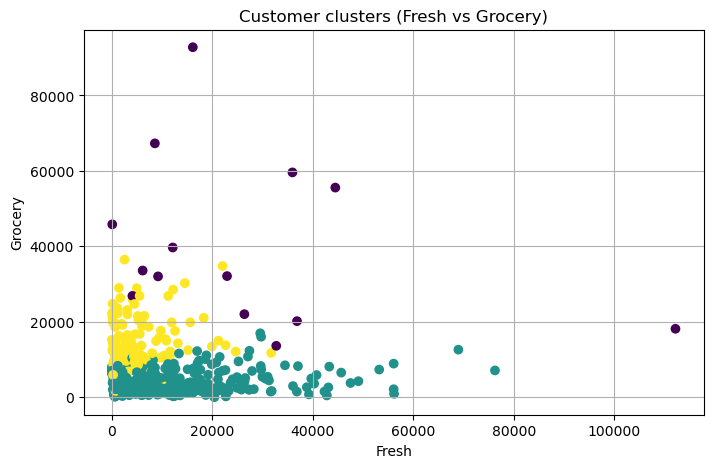

In [8]:
# Scatter plot: Fresh vs Grocery colored by cluster
plt.figure(figsize=(8, 5))
plt.scatter(df["Fresh"], df["Grocery"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.title("Customer clusters (Fresh vs Grocery)")
plt.grid(True)
plt.show()


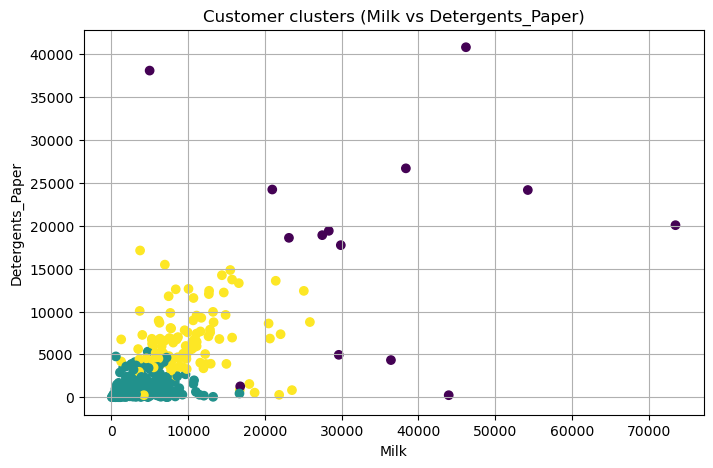

In [9]:
# Scatter plot: Milk vs Detergents_Paper colored by cluster
plt.figure(figsize=(8, 5))
plt.scatter(df["Milk"], df["Detergents_Paper"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Milk")
plt.ylabel("Detergents_Paper")
plt.title("Customer clusters (Milk vs Detergents_Paper)")
plt.grid(True)
plt.show()


In [10]:
# Average spending per cluster
cluster_profile = df.groupby("Cluster")[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].mean()
cluster_profile


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,26266.928571,33847.785714,39952.285714,10703.428571,18539.142857,7718.071429
1,13599.164557,3050.806962,3857.965190,3281.047468,854.620253,1168.955696
2,5591.436364,10113.027273,15637.390909,1499.918182,6711.354545,1759.090909
